# Árboles de decisión

<div style="text-align: right"><a>por </a><a href="https://www.linkedin.com/in/sheriff-data/" target="_blank">Manuel López Sheriff</a></div>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Intro

Un árbol de decisión intenta predecir la variable objetivo utilizando una lógica como la siguiente:

<img width=600 src="https://miro.medium.com/v2/resize:fit:1084/1*U6twhNSe1I37feFfBaeXLw.png">

Árboles de decisión:
 * se utilizan tanto para la clasificación (ejemplo anterior Fit/Unfit) como para la regresión
 * implican estratificar (segmentar) el espacio de predictores...
 * de forma iterativa
 * reciben este nombre porque las reglas de división pueden resumirse en un árbol

Árboles de decisión:
 * son simples
 * son útiles para la interpretación
 * no son predictores muy potentes, pero...
 * dan lugar a modelos más complejos, como los algoritmos Random Forest o Gradient Boosted Trees

## El problema

Hoy utilizaremos un conjunto de datos de **vino blanco**.

Los expertos han calificado varios vinos, cuyas propiedades físicas también se indican

In [2]:
df = pd.read_csv("../datasets/wine_quality.csv")

In [3]:
df.shape

(4898, 12)

In [6]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2290,7.4,0.18,0.24,1.40,0.047,21.0,106.0,0.99383,3.52,0.64,10.5,7
4467,6.3,0.25,0.27,6.60,0.054,40.0,158.0,0.99378,3.20,0.48,10.3,5
893,7.0,0.31,0.29,1.40,0.037,33.0,128.0,0.98960,3.12,0.36,12.2,7
3619,6.8,0.45,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
2127,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5


### Exploración de datos

In [7]:
# renombramos las columnas por comodidad
df.columns = [col.replace(" ", "_") for col in df.columns]

In [9]:
df.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
546,6.3,0.26,0.24,7.2,0.039,38.0,172.0,0.99580,3.49,0.64,9.7,6
4462,7.1,0.42,0.20,2.8,0.038,28.0,109.0,0.98968,3.23,0.47,13.4,6
107,7.1,0.23,0.35,16.5,0.040,60.0,171.0,0.99900,3.16,0.59,9.1,6
637,7.4,0.28,0.25,11.9,0.053,25.0,148.0,0.99760,3.10,0.62,9.2,5
2924,6.6,0.22,0.29,14.4,0.046,39.0,118.0,0.99834,3.05,0.50,9.1,6


Queremos:
 * construir un modelo de aprendizaje **supervisado**
 * de **regresión** (predecir variable cuantitativa)
 * que intenta predecir la `quality` del vino a partir de sus propiedades físicas (de modo que ya no necesitemos el asesoramiento de expertos)

<Axes: xlabel='quality', ylabel='count'>

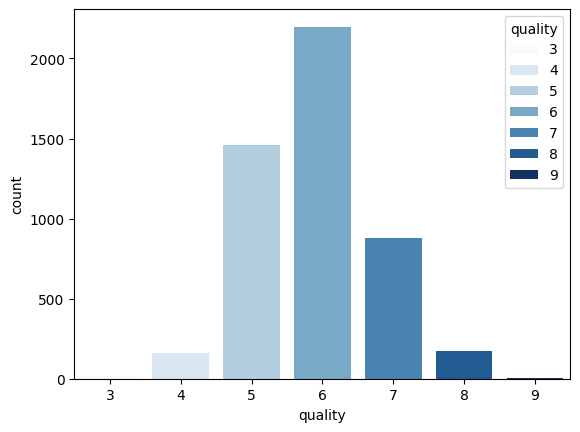

In [10]:
sns.countplot(x=df.quality, hue=df.quality, palette="Blues")

In [11]:
df.quality.value_counts().sort_index()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

In [12]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
df.corr()["quality"].sort_values()

density                -0.307123
chlorides              -0.209934
volatile_acidity       -0.194723
total_sulfur_dioxide   -0.174737
fixed_acidity          -0.113663
residual_sugar         -0.097577
citric_acid            -0.009209
free_sulfur_dioxide     0.008158
sulphates               0.053678
pH                      0.099427
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='alcohol', ylabel='quality'>

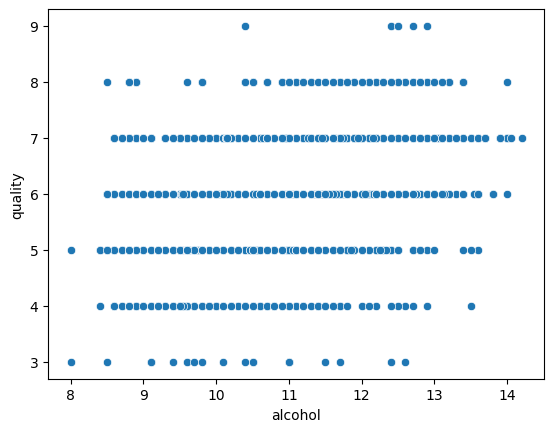

In [15]:
sns.scatterplot(x=df.alcohol, y=df.quality)

/tmp/ipykernel_6714/255594615.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.quality, y=df.alcohol, palette="Blues")


<Axes: xlabel='quality', ylabel='alcohol'>

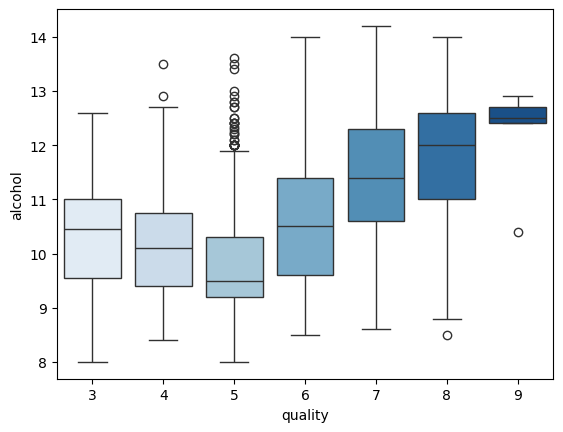

In [16]:
sns.boxplot(x=df.quality, y=df.alcohol, palette="Blues")

In [19]:
df.groupby("quality").alcohol.median().sort_index()

quality
3    10.45
4    10.10
5     9.50
6    10.50
7    11.40
8    12.00
9    12.50
Name: alcohol, dtype: float64

<Axes: xlabel='fixed_acidity', ylabel='volatile_acidity'>

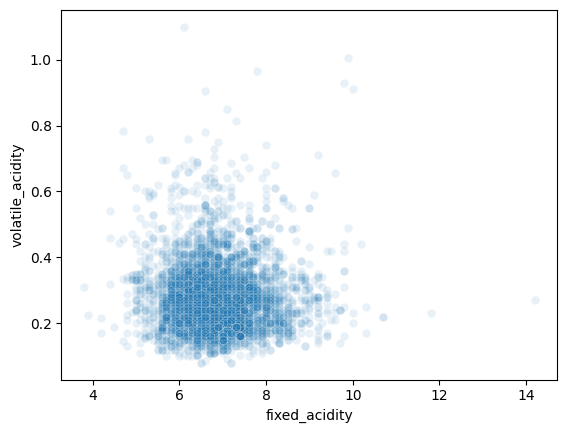

In [20]:
sns.scatterplot(x=df.fixed_acidity, y=df.volatile_acidity, alpha=0.1)

<Axes: xlabel='alcohol', ylabel='Count'>

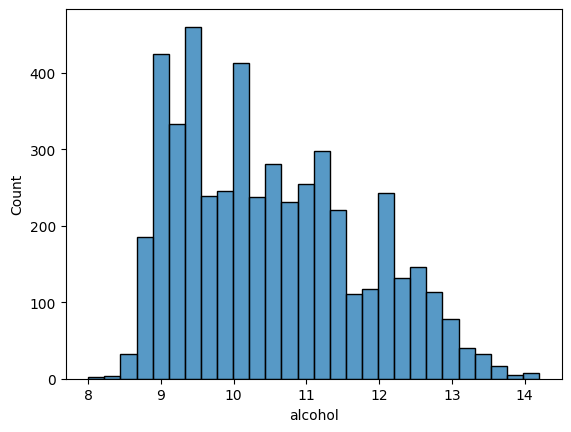

In [21]:
sns.histplot(x=df.alcohol)

### Train / test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop("quality", axis=1)

In [25]:
y = df.quality

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98)

In [27]:
X_train.shape

(3918, 11)

In [28]:
X_test.shape

(980, 11)

### Paréntesis: construyamos una regresión lineal

Para evaluar correctamente el rendimiento del modelo, usaremos train/test split y la métrica RMSE

$$RMSE=\sqrt{\frac{1}{N} \sum(y - \hat{y})^2}$$

In [29]:
from sklearn.metrics import mean_squared_error

1. Instancio una regresión lineal.

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lin = LinearRegression()

2. La entreno con los 3918 vinos de train

In [32]:
lin.fit(
    X=X_train, 
    y=y_train
)

LinearRegression()

In [33]:
lin.intercept_

222.5674509543884

In [36]:
pd.Series(lin.coef_, index=X.columns).sort_values()

density                -223.060059
volatile_acidity         -1.826155
chlorides                -0.315869
citric_acid              -0.051361
total_sulfur_dioxide     -0.000244
free_sulfur_dioxide       0.003580
alcohol                   0.105188
residual_sugar            0.107516
fixed_acidity             0.120023
sulphates                 0.746717
pH                        0.788297
dtype: float64

3. Cojo un vino nuevo. Cómo se predice su `quality`?

In [35]:
X_test[:5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
2489,6.1,0.28,0.24,19.95,0.074,32.0,174.0,0.99922,3.19,0.44,9.300000
117,7.0,0.14,0.40,1.70,0.035,16.0,85.0,0.99110,3.19,0.42,11.800000
938,6.2,0.35,0.29,7.30,0.044,56.0,244.0,0.99560,3.36,0.55,10.000000
3630,6.6,0.30,0.25,8.00,0.036,21.0,124.0,0.99362,3.06,0.38,10.800000
4358,6.5,0.23,0.20,7.50,0.050,44.0,179.0,0.99504,3.18,0.48,9.533333


In [37]:
lin.predict(X_test[:5]).round(2)

array([5.91, 6.33, 5.6 , 5.89, 5.74])

In [38]:
y_test[:5]

2489    6
117     6
938     6
3630    6
4358    5
Name: quality, dtype: int64

In [39]:
from sklearn.metrics import mean_squared_error

In [41]:
# train error (MSE)
mean_squared_error(y_train, lin.predict(X_train), squared=False).round(3)

0.74

In [40]:
# test error (MSE)
mean_squared_error(y_test, lin.predict(X_test), squared=False).round(3)

0.798

Suele funcionar mejor el modelo sobre el train

## Decision trees

Para evaluar correctamente el rendimiento del modelo, usaremos train/test split y la métrica RMSE

$$RMSE=\sqrt{\frac{1}{N} \sum(y - \hat{y})^2}$$

Vamos a:
 * probar varios modelos y...
 * nos quedaremos con el que tenga el **menor** RMSE en el **conjunto de test** (también llamado test error)
 * también mostraremos el error en el train

### Baseline model

El modelo baseline da la misma predicción para todos los vinos: la `quality` media

Es bueno evaluar este modelo para tenerlo de referencia

In [47]:
baseline = y_train.mean()

In [48]:
baseline

5.8825931597753955

El RMSE puede calcularse manualmente

Train error

In [49]:
(((y_train - baseline) ** 2).mean() ** 0.5).round(3)

0.879

Test error

In [50]:
(((y_test - baseline) ** 2).mean() ** 0.5).round(3)

0.91

Como era de esperar, el error en el test es mayor que el del train

### Regresión lineal

Recordemos los resultados anteriores de la regresión lineal:

In [41]:
# train error (MSE)
mean_squared_error(y_train, lin.predict(X_train), squared=False).round(3)

0.74

In [40]:
# test error (MSE)
mean_squared_error(y_test, lin.predict(X_test), squared=False).round(3)

0.798

### Simple tree (depth=1)

Primero entrenemos el Decision Tree, luego interpretémoslo

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
model = DecisionTreeRegressor(max_depth=1, random_state=6666)

In [53]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=6666)

Veamos cómo predice este modelo los 5 primeros vinos

In [54]:
# real values
y_test[:5]

2489    6
117     6
938     6
3630    6
4358    5
Name: quality, dtype: int64

In [55]:
# predicted values
model.predict(X_test[:5].values).round(2)

/home/sheriff/teaching-env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5.6 , 6.37, 5.6 , 5.6 , 5.6 ])

Train error

In [56]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train),
    squared=False
).round(3)

0.799

Test error

In [57]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test),
    squared=False
).round(3)

0.86

In [58]:
from sklearn.tree import plot_tree

In [59]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [62]:
y_train.mean()

5.8825931597753955

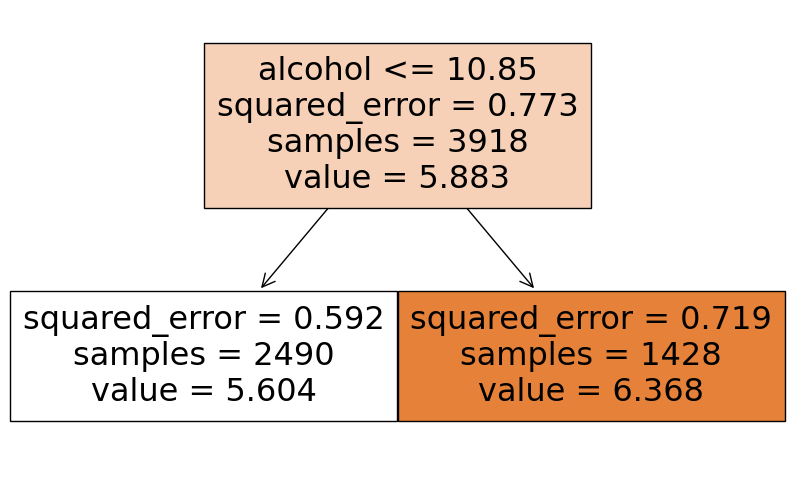

In [60]:
fig = plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

In [63]:
mean_squared_error(y_train, model.predict(X_train)).round(3)

0.638

Es la media ponderada de los MSE de las hojas

Algunas preguntas importantes para una comprensión profunda:

 1. durante el entrenamiento, ¿por qué el árbol de decisión eligió la variable `alcohol` y el corte $10.85$?

Veamos qué hace el árbol en detalle para tomar esta decisión:

In [64]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Imagina que elegimos `residual_sugar` y el valor 5

In [65]:
group1 = X_train[X_train.residual_sugar <= 5].copy()
group2 = X_train[X_train.residual_sugar > 5].copy()

In [66]:
group1.shape

(1914, 11)

In [67]:
group2.shape

(2004, 11)

In [68]:
group1_mean = y_train[group1.index].mean()

In [69]:
group1_mean

5.974921630094044

In [70]:
group2_mean = y_train[group2.index].mean()

In [71]:
group2_mean

5.794411177644711

In [72]:
mse = ((
    ((y_train[group1.index] - group1_mean) ** 2).sum() +
    ((y_train[group2.index] - group2_mean) ** 2).sum()
) / X_train.shape[0])

In [73]:
mse

0.7652102203762468

Mejora pequeña sobre el modelo de referencia, y mucho peor que el alcohol 10.85, que es el par (característica-umbral) óptimo

In [ ]:
fig = plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

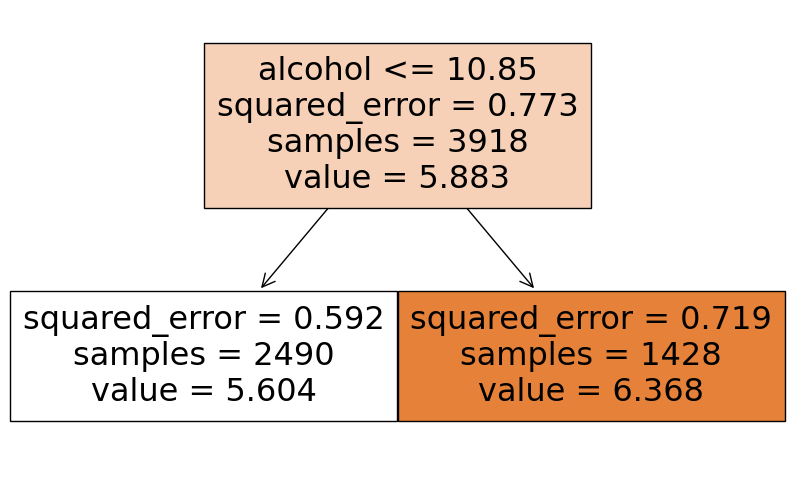

In [60]:
fig = plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

2. qué significa `squared_error`?  
   el error cuadrático medio en esa rama: el que se obtendría si a cada vino de esa rama se le diera la media de la rama

3. qué significa `value`?  
   la calidad media de los vinos de esa rama. El valor que se predecirá para cada nuevo vino que termine en esa hoja del árbol.

4. durante el testing (predicción de una nueva instancia), ¿cómo funciona el árbol?  
   Recorre un único camino. Cuando este camino termina, el valor en esa hoja es la predicción

### Bigger tree (depth=3)

In [75]:
model = DecisionTreeRegressor(max_depth=3, random_state=666)

In [76]:
%%time
model.fit(X_train, y_train)

CPU times: user 9.21 ms, sys: 0 ns, total: 9.21 ms
Wall time: 8.41 ms


DecisionTreeRegressor(max_depth=3, random_state=666)

In [77]:
# real values
y_test[:15]

2489    6
117     6
938     6
3630    6
4358    5
3392    6
1655    5
671     6
734     5
1785    6
917     6
3067    4
3587    6
4189    5
198     5
Name: quality, dtype: int64

In [78]:
# predicted values
model.predict(X_test[:15].values).round(2)

/home/sheriff/teaching-env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5.55, 6.61, 5.24, 5.55, 5.86, 6.61, 5.55, 6.23, 5.24, 6.23, 6.23,
       5.55, 6.2 , 5.86, 5.24])

Train error

In [79]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
).round(3)

0.547

Test error

In [80]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
).round(3)

0.645

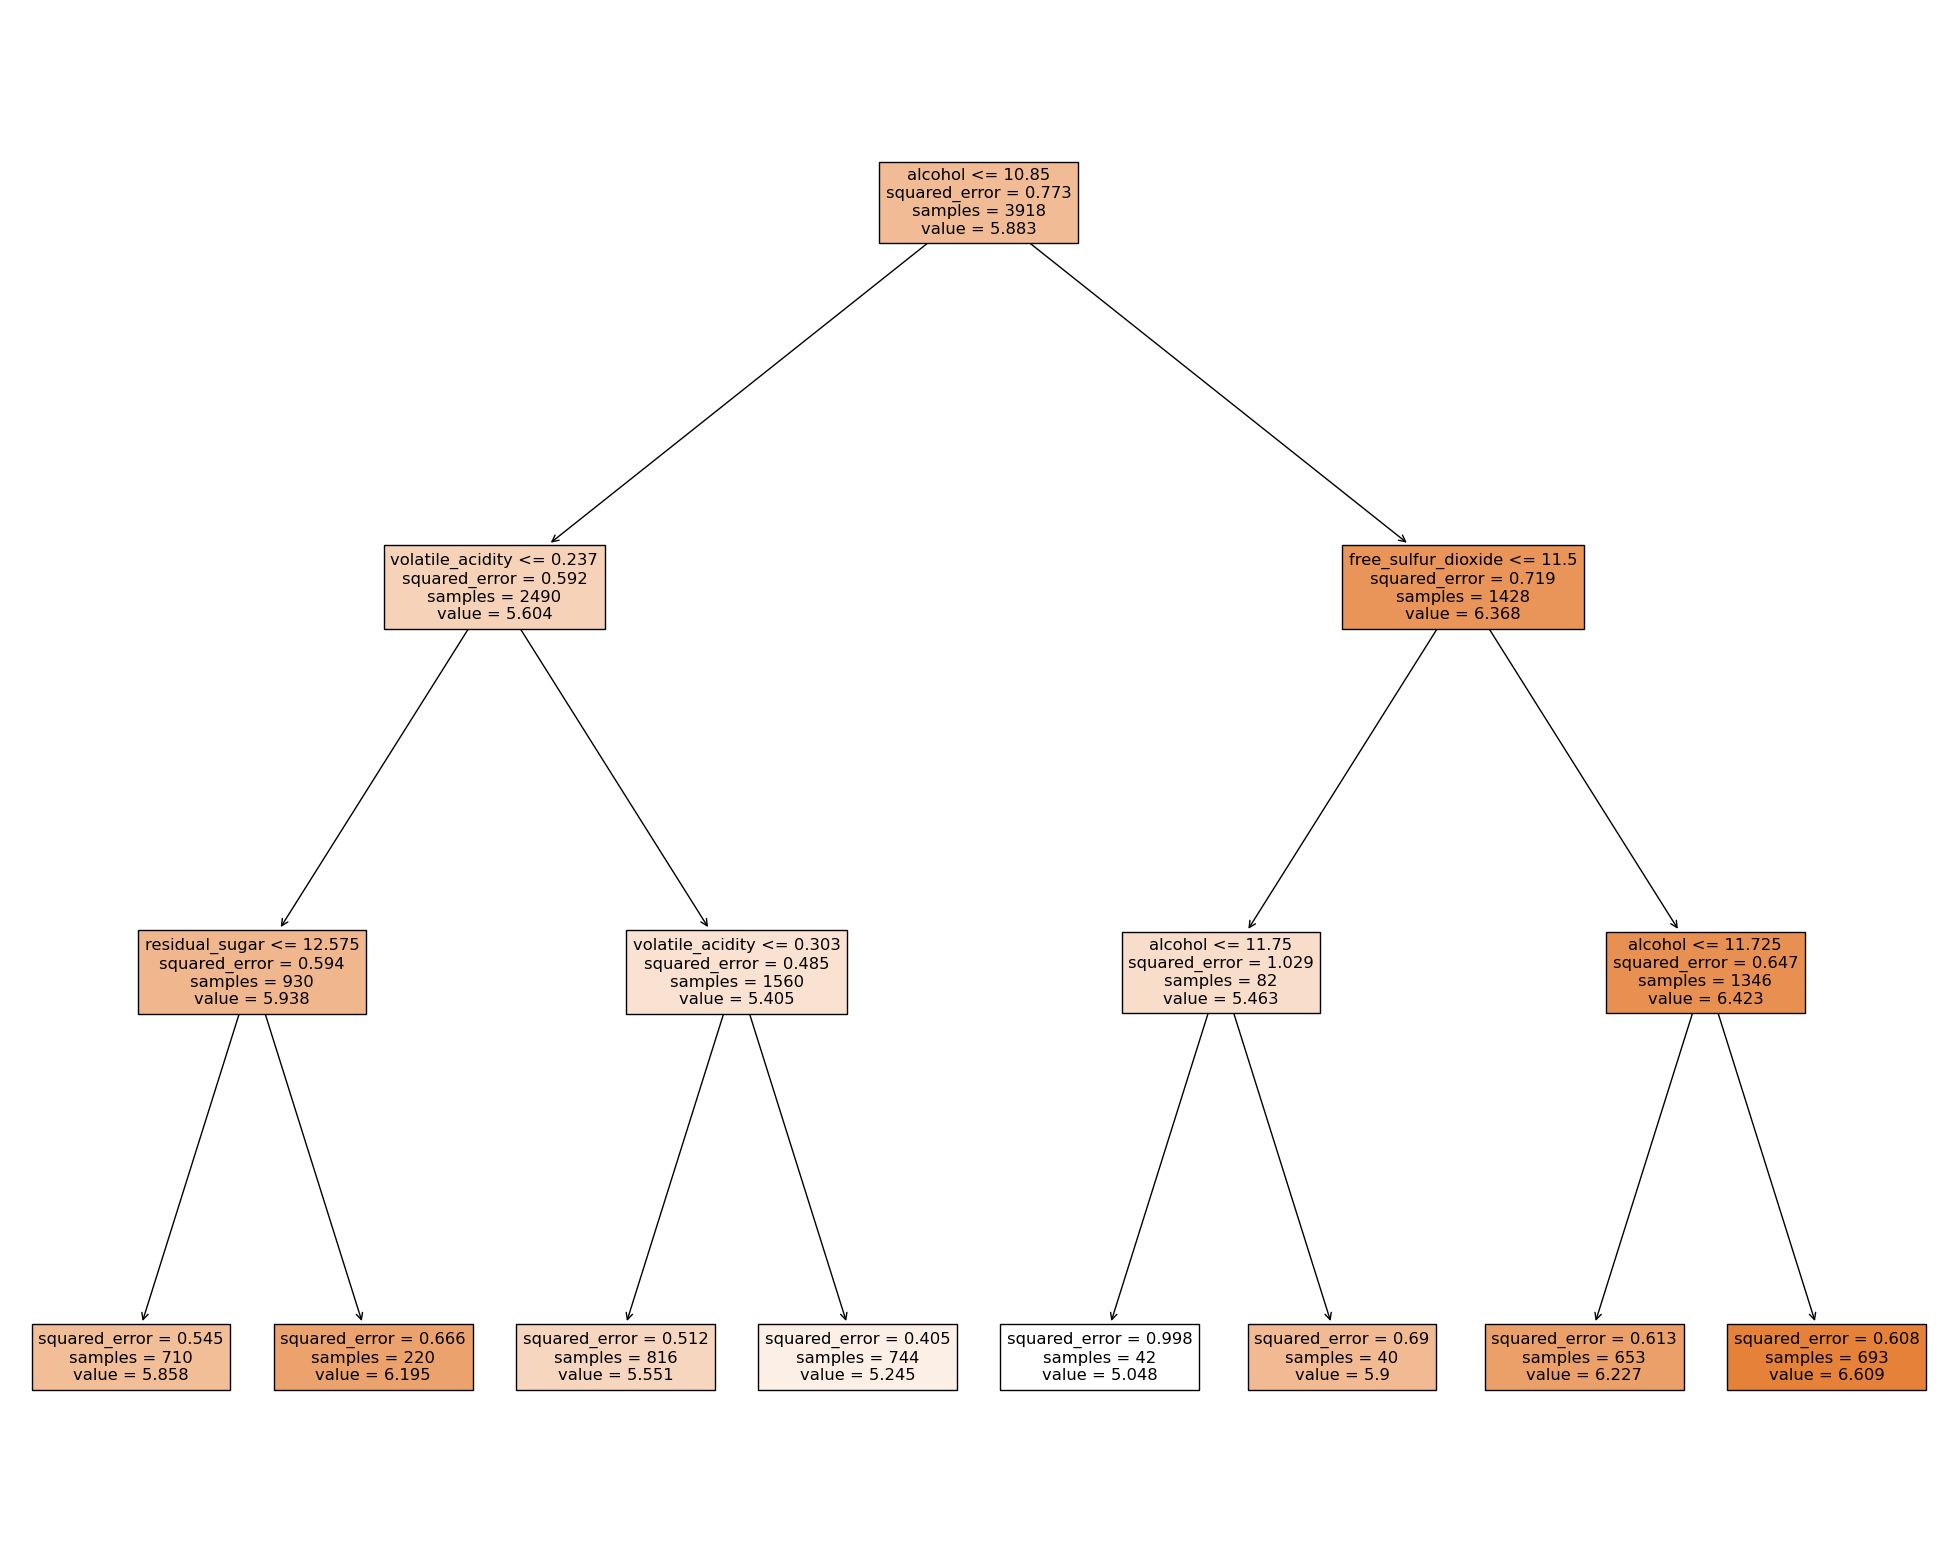

In [81]:
fig = plt.figure(figsize=(25, 20))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

In [82]:
fig.savefig("depth3.svg")

### Huge tree (depth=20)

In [86]:
model = DecisionTreeRegressor(max_depth=20, random_state=666)

In [87]:
%%time
model.fit(X_train, y_train)

CPU times: user 32.1 ms, sys: 3.06 ms, total: 35.1 ms
Wall time: 34.3 ms


DecisionTreeRegressor(max_depth=20, random_state=666)

Train error

In [88]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

0.01683994549045101

Test error

In [89]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

0.7246850481459339

### Overfitting

Veamos cómo cambia el error de train y de test al ir variando `max_depth`

In [90]:
results = []

for depth in range(1, 21):
    model = DecisionTreeRegressor(max_depth=depth, random_state=666)
    model.fit(X_train, y_train)
    
    result = {
        "model": model,
        "depth": depth,
        "train_error": mean_squared_error(y_train, model.predict(X_train)),
        "test_error": mean_squared_error(y_test, model.predict(X_test))
    }
    
    results.append(result)

In [93]:
results_df = pd.DataFrame(results).round(3)

In [94]:
results_df

,model,depth,train_error,test_error
0,"DecisionTreeRegressor(max_depth=1, random_stat...",1,0.638,0.739
1,"DecisionTreeRegressor(max_depth=2, random_stat...",2,0.578,0.668
2,"DecisionTreeRegressor(max_depth=3, random_stat...",3,0.547,0.645
3,"DecisionTreeRegressor(max_depth=4, random_stat...",4,0.513,0.618
4,"DecisionTreeRegressor(max_depth=5, random_stat...",5,0.480,0.629
5,"DecisionTreeRegressor(max_depth=6, random_stat...",6,0.446,0.607
6,"DecisionTreeRegressor(max_depth=7, random_stat...",7,0.405,0.600
7,"DecisionTreeRegressor(max_depth=8, random_stat...",8,0.357,0.631
8,"DecisionTreeRegressor(max_depth=9, random_stat...",9,0.305,0.656
9,"DecisionTreeRegressor(max_depth=10, random_sta...",10,0.252,0.680


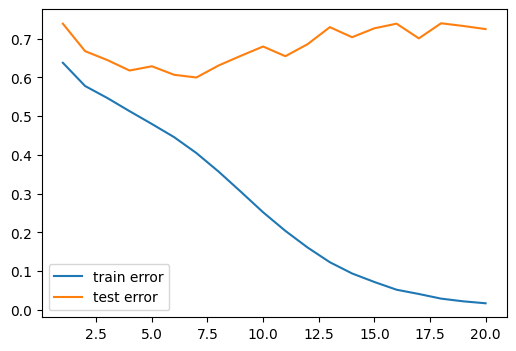

In [96]:
fig = plt.figure(figsize=(6, 4))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

Podemos ver cómo, cuando `max_depth` aumenta por encima de ~7:
 * el error de train sigue disminuyendo (más precisión en las muestras de entrenamiento)
 * el error de test aumenta (el modelo memoriza el conjunto de muestras de entrenamiento y no generaliza muy bien)

Es el famoso **overfitting**

Recuerda: el **test error** es el que hay que tener en cuenta para evaluar la performance de un modelo

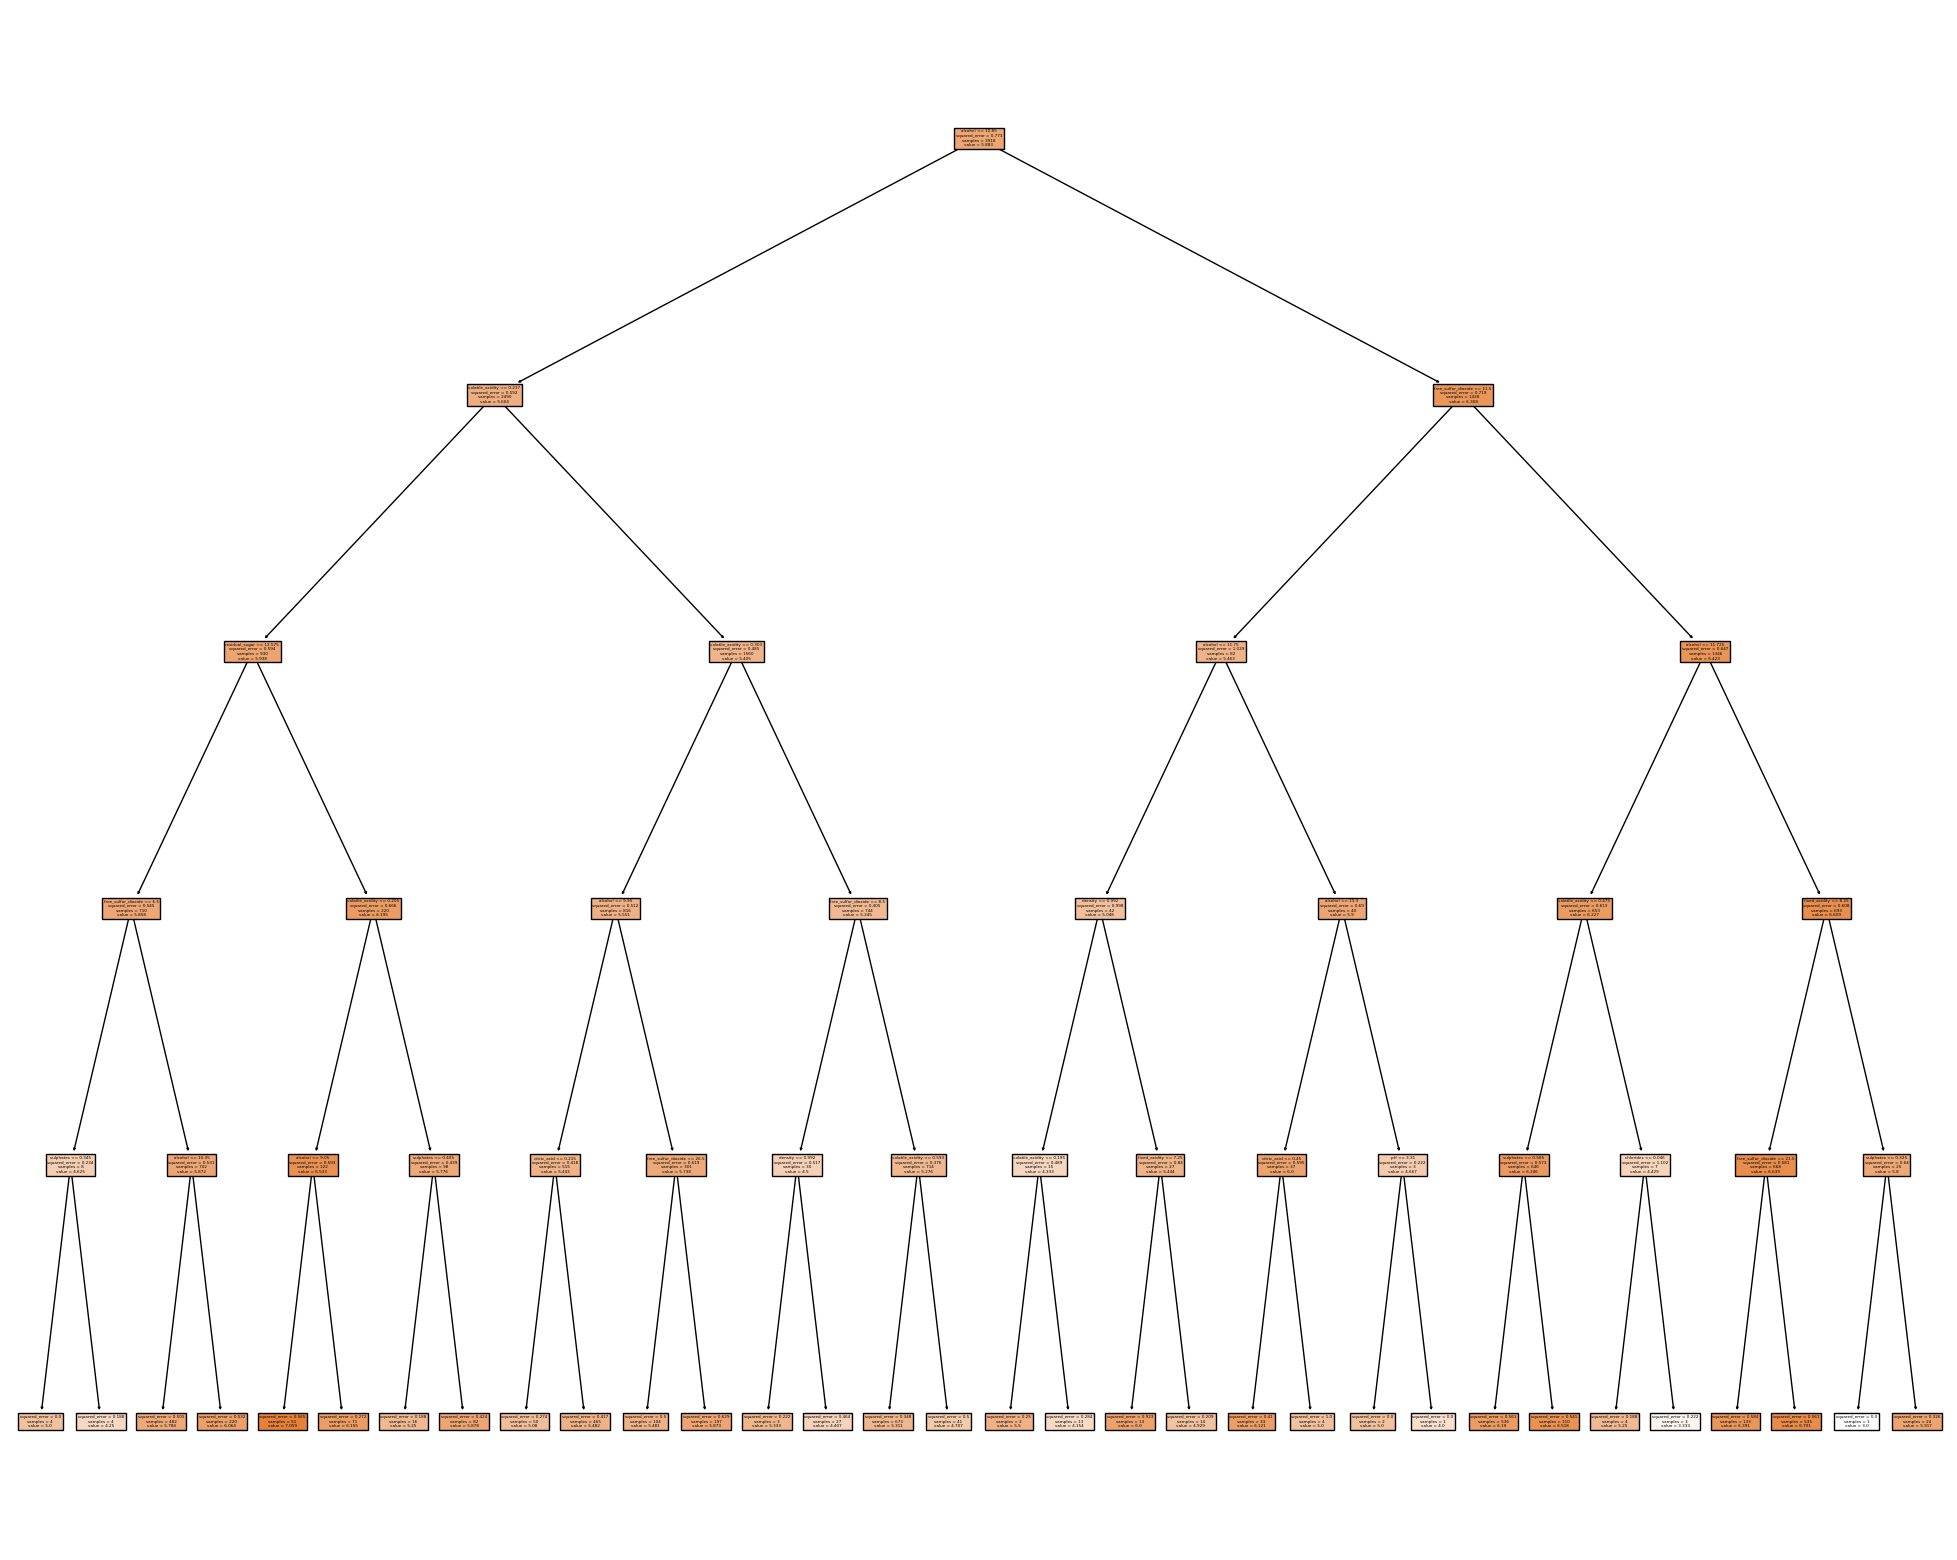

In [97]:
fig = plt.figure(figsize=(25,20))
plot_tree(results_df.loc[4].model, feature_names=df.columns[:-1], filled=True);

In [98]:
fig.savefig("depth5.svg")

### Otros hiperparámetros

Además de `max_depth`, existen otros **hiperparámetros** que nos permiten construir diferentes arquitecturas de árboles de la familia DecisionTreeRegressor:

 * `min_samples_split`: el número mínimo de muestras necesarias para dividir un nodo

 * `max_features`: el número de features a considerar cuando se busca el mejor corte

In [99]:
model = DecisionTreeRegressor(max_depth=7, min_samples_split=30, random_state=666)

In [100]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=30, random_state=666)

In [102]:
print(f"train error: {mean_squared_error(y_train, model.predict(X_train))}")
print(f"test error: {mean_squared_error(y_test, model.predict(X_test))}")

train error: 0.4254921606155106
test error: 0.5631831254436286


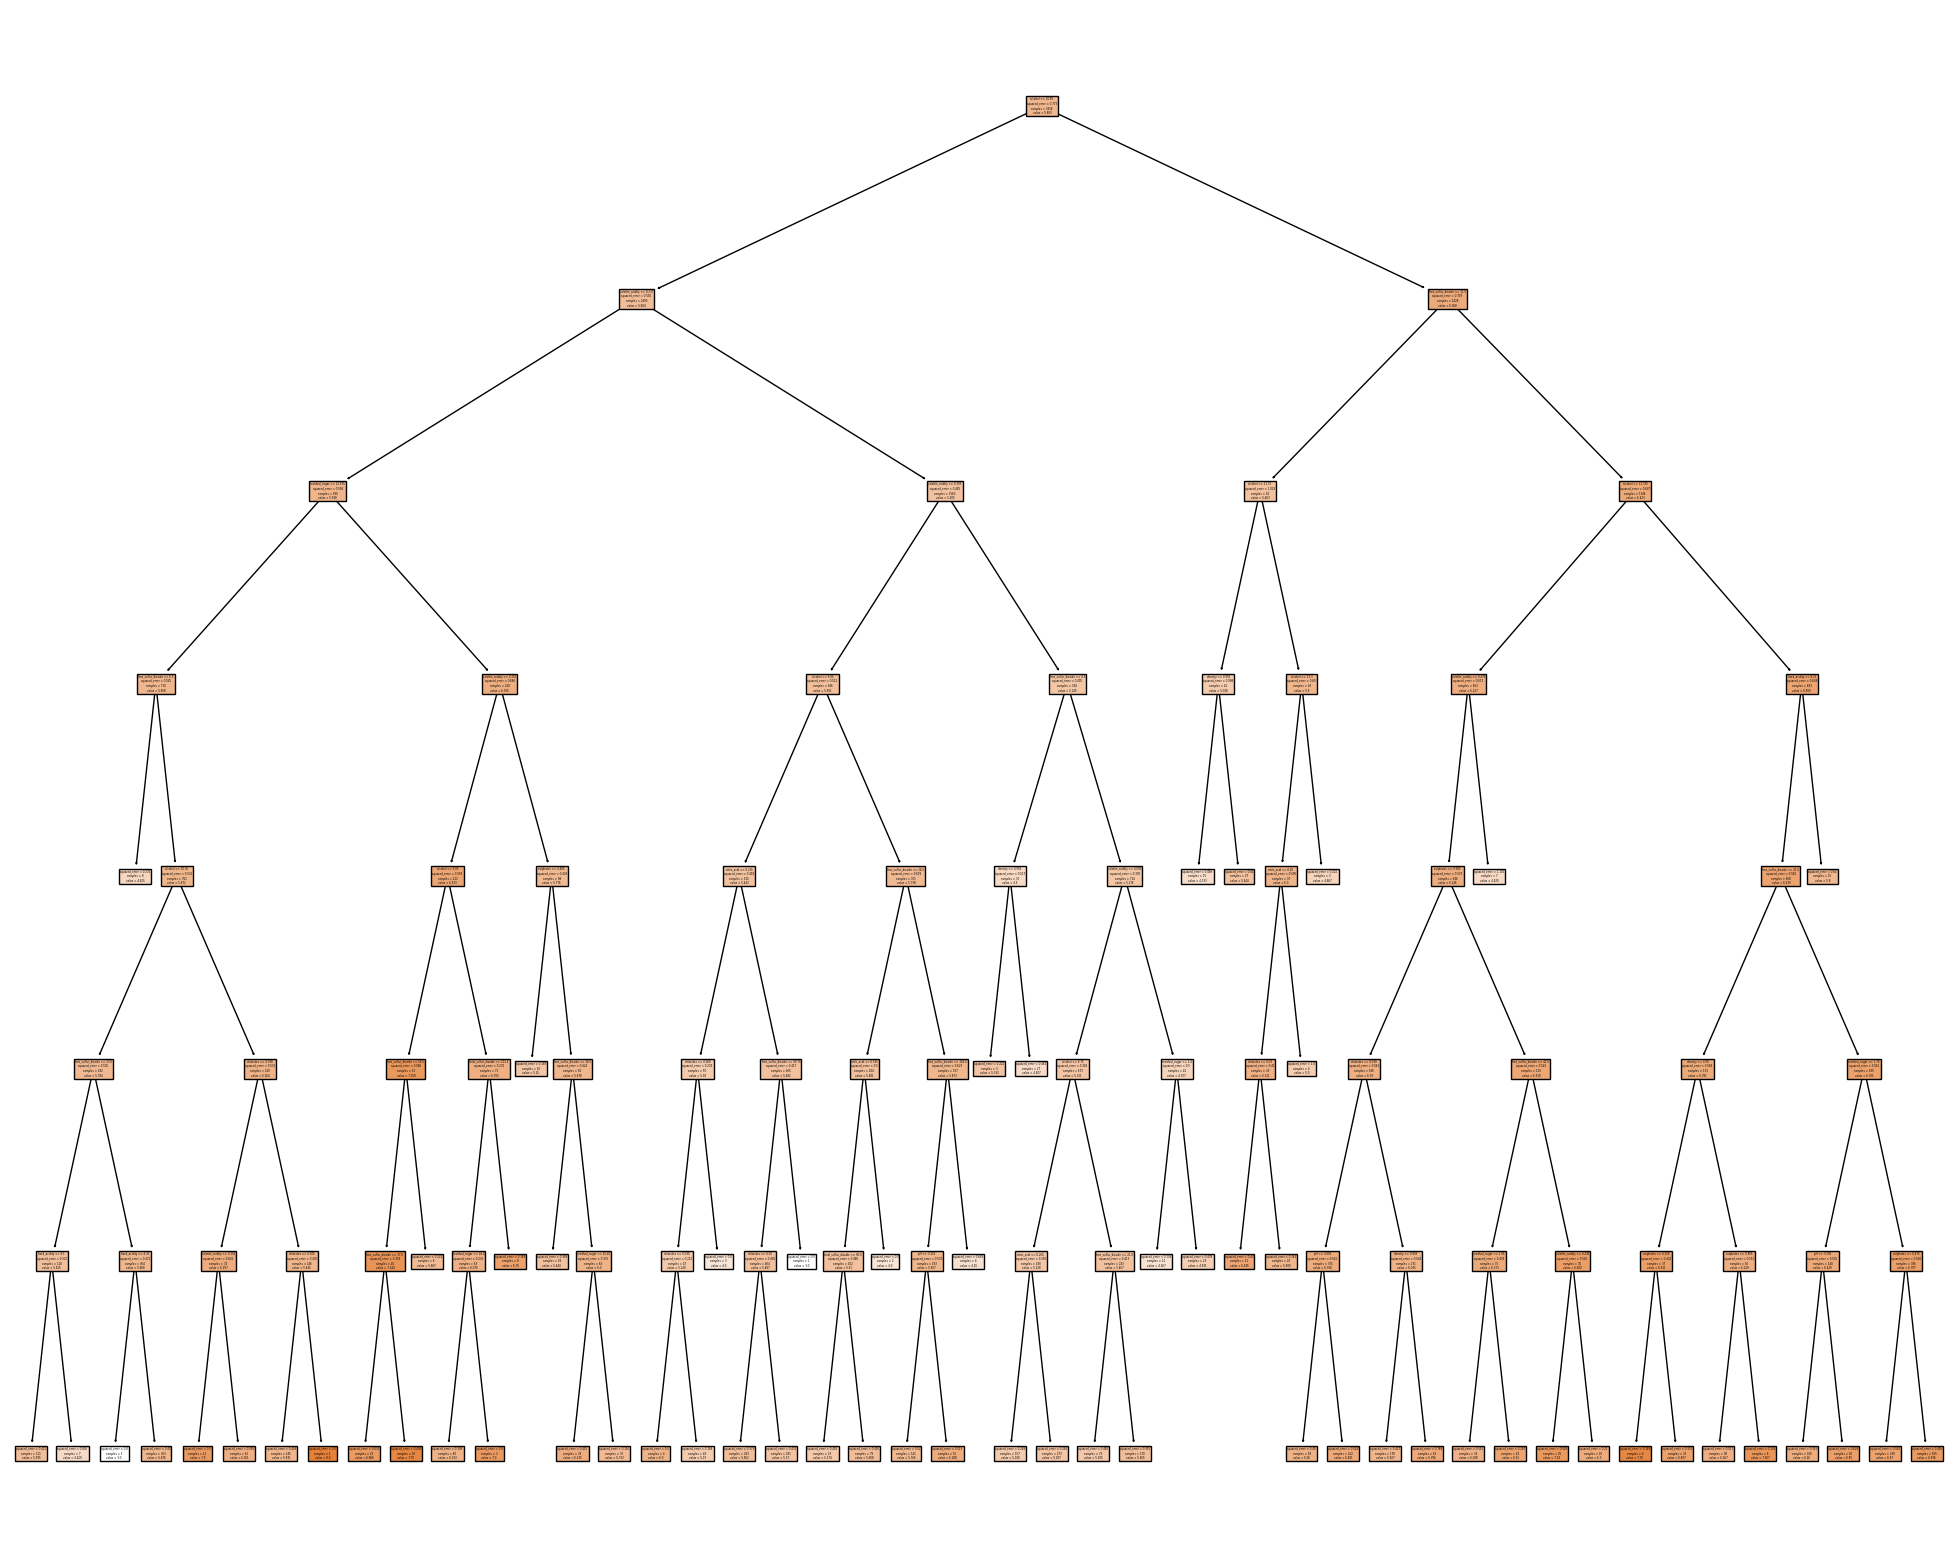

In [103]:
fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

In [104]:
fig.savefig("depth7-maxsplit30.svg")

### Grid search

Busquemos la *mejor* combinación de hiperparámetros, es decir, la que produzca el menor error de test, entre un grid prescrito de valores para cada hiperparámetro

In [105]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

In [107]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [6, 7, 8],
        "min_samples_split": [20, 30, 50, 100, 200],
    },
    cv=5,
    verbose=1,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

Probará 3 * 5 = 9 opciones

In [108]:
%%time
gs.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
CPU times: user 1.36 s, sys: 0 ns, total: 1.36 s
Wall time: 1.37 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 7, 8],
                         'min_samples_split': [20, 30, 50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

Ordenemos todos los árboles según su rendimiento:

In [109]:
grid_search_results = pd.DataFrame(gs.cv_results_)

grid_search_results = grid_search_results[['param_max_depth', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [110]:
grid_search_results.sort_values("mean_test_score", ascending=False)

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
5,7,20,-0.520451,-0.412491
6,7,30,-0.522884,-0.421398
7,7,50,-0.523825,-0.434313
1,6,30,-0.524333,-0.451496
11,8,30,-0.524357,-0.390899
10,8,20,-0.524828,-0.377446
13,8,100,-0.526919,-0.441222
12,8,50,-0.527268,-0.409888
0,6,20,-0.527685,-0.445494
2,6,50,-0.528185,-0.459195


Podemos acceder al mejor estimador del Grid Search:

In [111]:
best_tree = gs.best_estimator_

In [112]:
best_tree

DecisionTreeRegressor(max_depth=7, min_samples_split=20)

In [113]:
mean_squared_error(best_tree.predict(X_train), y_train)

0.4174409408737732

In [114]:
mean_squared_error(best_tree.predict(X_test), y_test)

0.5742664032676825

## Feature importance

¿Qué importancia tiene cada feature para predecir la `quality`?

DecisionTreeRegressor tiene un atributo `feature_importances_`

In [115]:
best_tree

DecisionTreeRegressor(max_depth=7, min_samples_split=20)

In [116]:
feature_imp = pd.Series(best_tree.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)

In [117]:
feature_imp.round(3)

alcohol                 0.475
volatile_acidity        0.204
free_sulfur_dioxide     0.134
residual_sugar          0.036
sulphates               0.034
fixed_acidity           0.030
chlorides               0.024
density                 0.021
pH                      0.021
citric_acid             0.014
total_sulfur_dioxide    0.006
dtype: float64

In [123]:
vinito = X_test[:1]

In [124]:
vinito

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
2489,6.1,0.28,0.24,19.95,0.074,32.0,174.0,0.99922,3.19,0.44,9.3


In [125]:
best_tree.predict(vinito)

array([5.37016575])

In [126]:
vinito_azucarado = vinito.copy()

In [127]:
vinito_azucarado.iloc[0, -1] = 11

In [128]:
best_tree.predict(vinito_azucarado)

array([6.39622642])

<Axes: ylabel='None'>

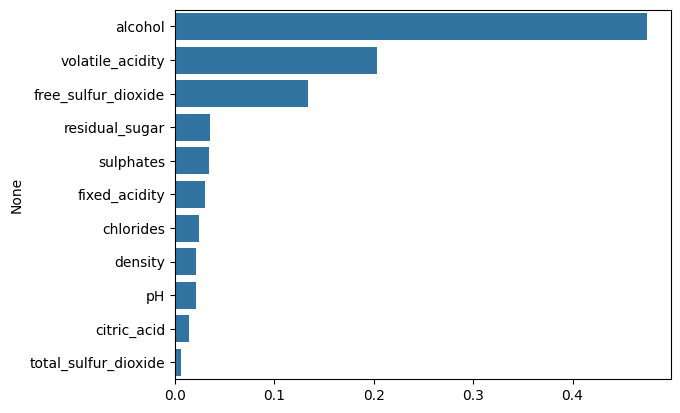

In [129]:
sns.barplot(x=feature_imp.values, y=feature_imp.index)

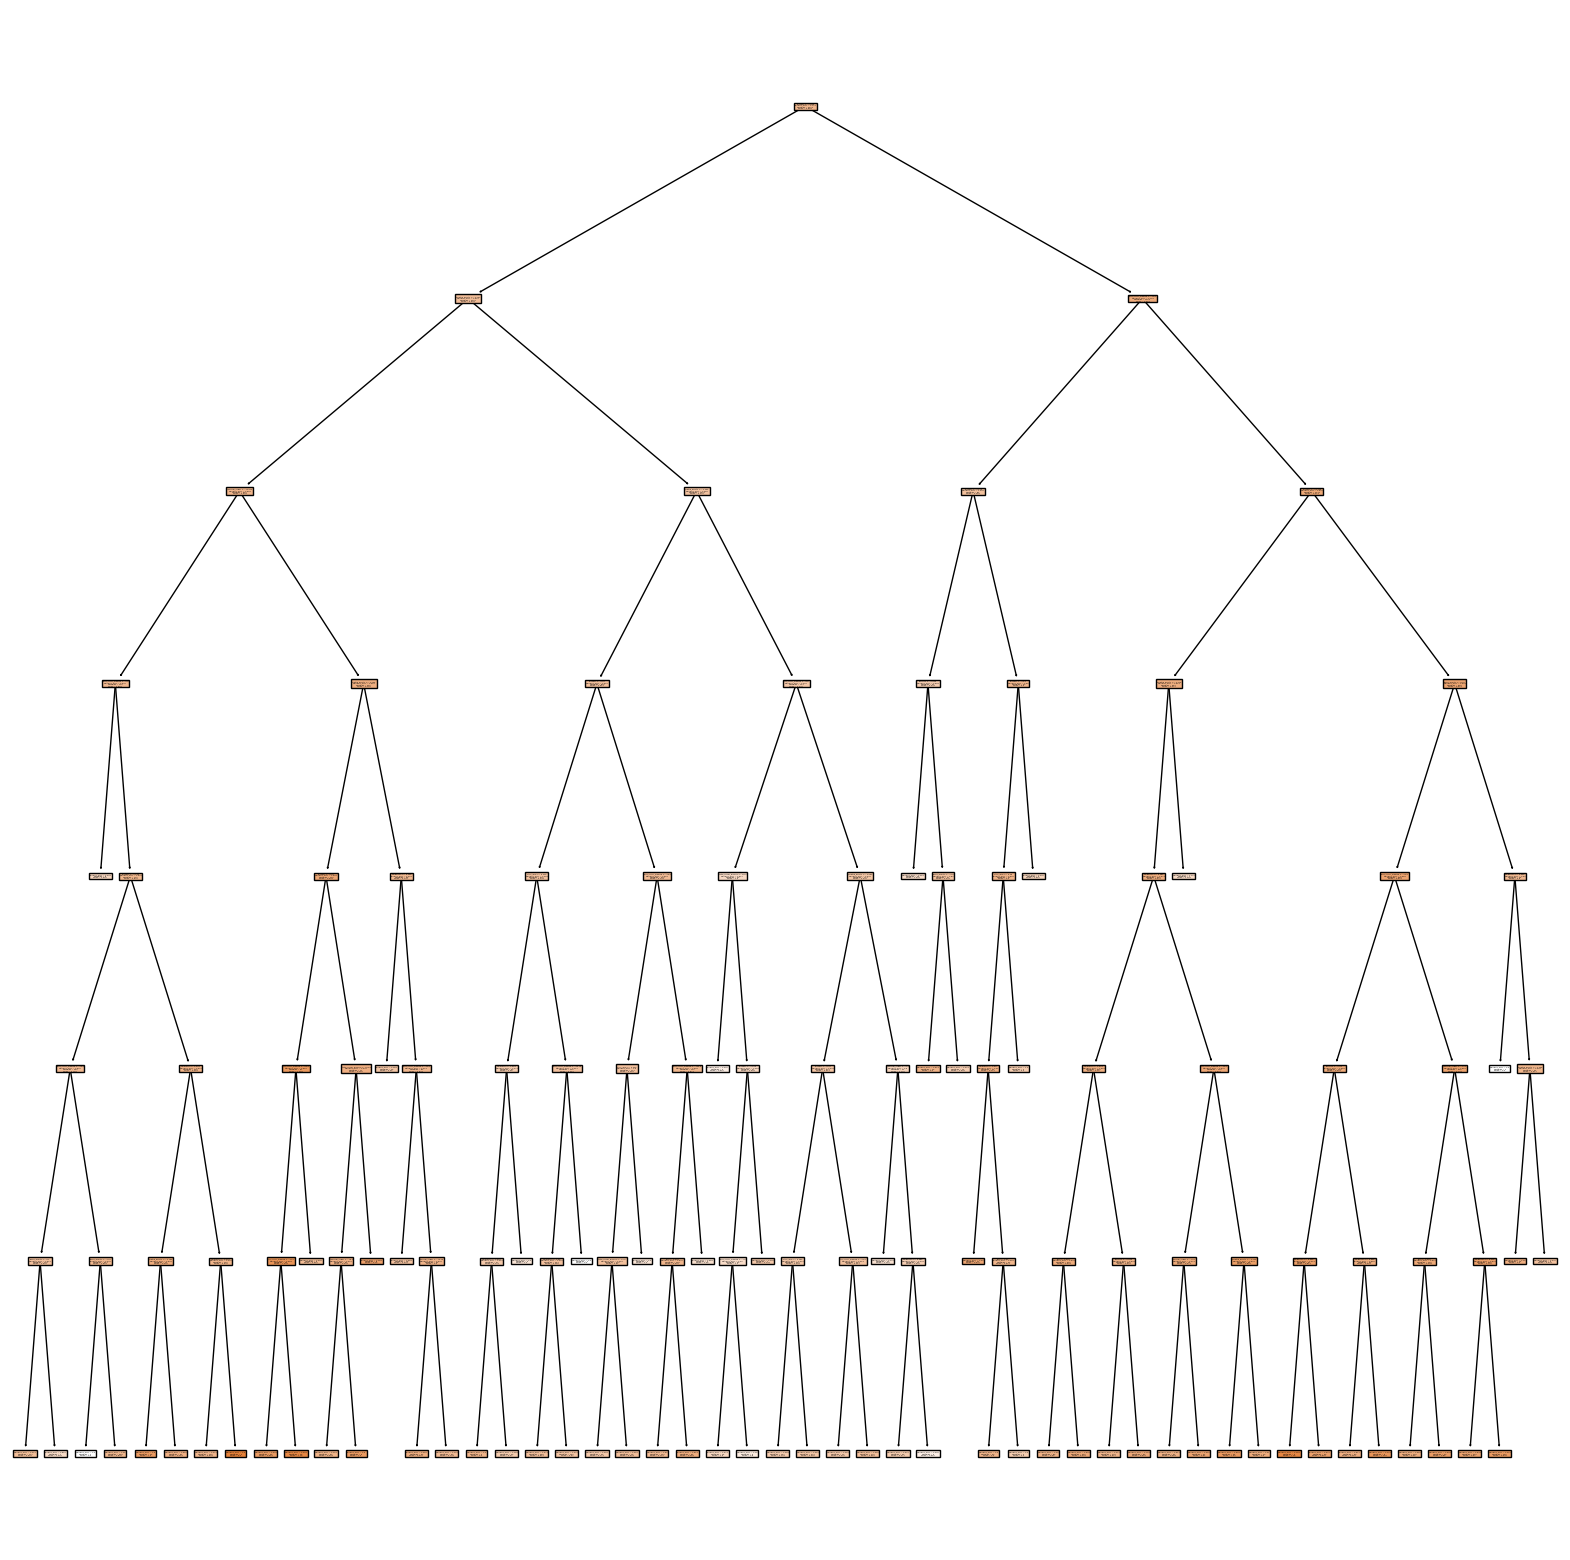

In [130]:
fig = plt.figure(figsize=(20, 20))
plot_tree(best_tree, feature_names=df.columns[:-1], filled=True);

In [ ]:
fig.savefig("decision_tree.svg", facecolor="white")

## Resumen

 * Los árboles de decisión son útiles para la regresión (`DecisionTreeRegressor`) y la clasificación (`DecisionTreeClassifier`)
 * Su comportamiento es bastante intuitivo
 * Su comportamiento es interpretable y explicable

 * Los árboles de decisión tienen overfitting cuando `max_depth` se hace muy grande (obvio, muchas hojas con muy pocas muestras _memorizadas_ cada una)
 * Prevenir el overfitting (siempre, no sólo en los métodos basados en árboles) observando el error de train y el error de test

 * Un árbol de decisión no suele ser un algoritmo de ML muy potente
 * Los árboles de decisión son los componentes básicos de algoritmos más avanzados y potentes.